Bank Term Deposit Predictions

 Objective: To determine whether or not a customer would subscribe to a term deposit offered by the bank.

Column name                  	Description
age	The age of the customer. (Numerical)

job	The occupation/employment status of the customer. (Categorical)

marital	The marital status of the customer. (Categorical)

education	The education level attained by the customer. (Categorical)

default	Whether the customer has credit in default or not. (Categorical)

balance	The balance in the customer's account. (Numerical)

housing	Whether the customer has a housing loan or not. (Categorical)

contact	Type of communication used to contact customers (phone, cellular, etc.). (Categorical)

day	Day of the month when customers were last contacted. (Numerical)

duration	Duration (in seconds) of the last contact with customers during the previous campaign. (Numerical)

pdays	The number of days passed by after contact from the previous campaign. (Numerical)

poutcome	Outcome from the previous marketing campaign. (Categorical)

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [41]:
df=pd.read_csv("/content/train.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [42]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [44]:
df.shape

(45211, 17)

In [45]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [46]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


UNDERSTANDING COLUMNS

In [47]:
for i in df.columns:
  print(df[i].value_counts())
  print("\n")

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64


blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


no     44396
yes      815
Name: default, dtype: int64


 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: balance, Length: 7168, dtype: int64


yes    25130
no     20081
Name: housing, dtype: int64


no     37967
yes     7244
Name: loan, 

In [48]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

<Axes: >

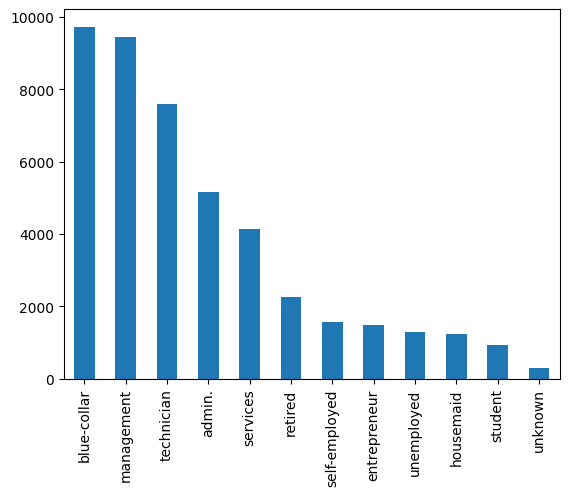

In [49]:
df['job'].value_counts().plot(kind="bar")

Let's convert categorical columns to numerical ones

In [51]:
df["outcome"]=df["y"]

In [52]:
df = df.drop("y",axis=1)

In [53]:
df=df.drop("loan",axis=1)

In [54]:
df.head(2)

,age,job,marital,education,default,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,outcome
0,58,management,married,tertiary,no,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,unknown,5,may,151,1,-1,0,unknown,no


In [30]:
df.describe()

,age,job,marital,education,default,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,outcome
count,38358.000000,38358.000000,38358.000000,38358.000000,38358.000000,38358.000000,38358.000000,38358.000000,38357.000000,38358.000000,38357.000000,38357.000000,38357.000000,38357.000000,38358.000000,38358.000000
mean,40.725455,4.271000,1.145550,1.197377,0.020752,1268.383258,0.596746,1.723369,15.991736,5.415924,255.675209,2.900696,29.293375,0.386474,2.669013,0.068121
std,9.598442,3.288272,0.602079,0.743065,0.142554,2865.891288,0.490557,0.930458,8.316972,2.931314,259.850015,3.281016,87.106399,2.119752,0.899748,0.252061
min,19.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,53.000000,0.000000,1.000000,8.000000,3.000000,100.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,405.000000,1.000000,1.000000,16.000000,6.000000,176.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1312.750000,1.000000,3.000000,21.000000,8.000000,314.000000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,98417.000000,1.000000,3.000000,31.000000,11.000000,4918.000000,63.000000,374.000000,275.000000,4.000000,2.000000


In [55]:
df["outcome"].value_counts()

no     39922
yes     5289
Name: outcome, dtype: int64

Text(0, 0.5, 'total number of subscriptions')

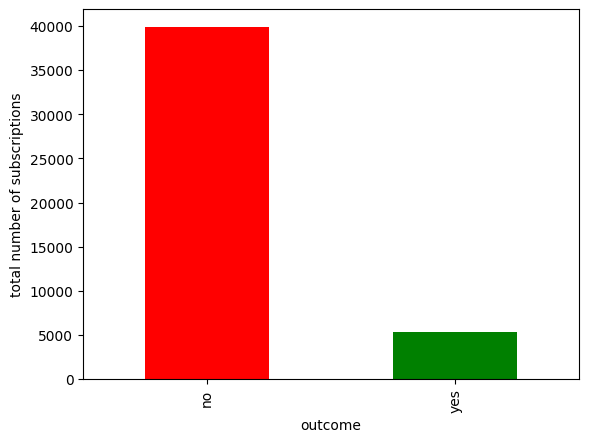

In [57]:
df["outcome"].value_counts().plot(kind = "bar",color=["red","green"])
plt.xlabel("outcome")
plt.ylabel("total number of subscriptions")

In [58]:
pd.crosstab(df.marital, df.outcome)

outcome,no,yes
marital,,
divorced,4585,622
married,24459,2755
single,10878,1912


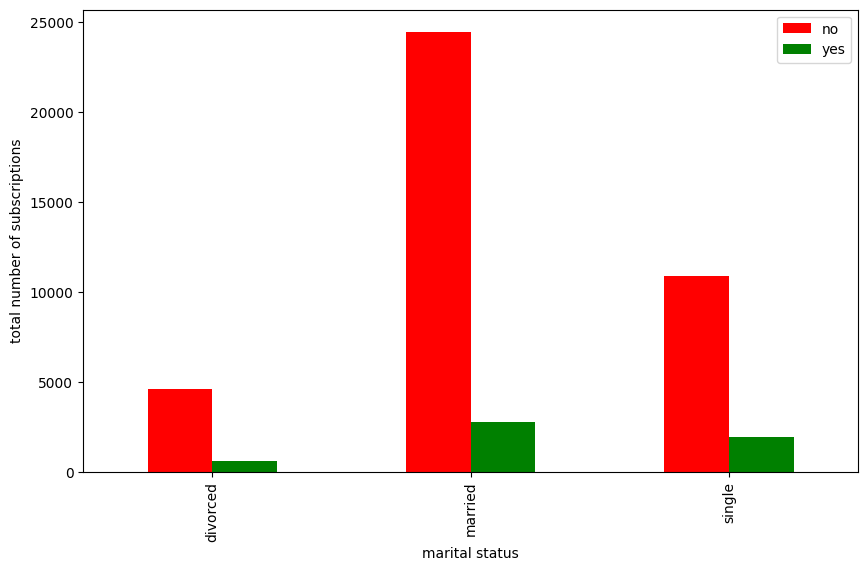

In [60]:
pd.crosstab(df.marital, df.outcome).plot(kind="bar", figsize=(10,6), color=["red", "green"])
plt.xlabel("marital status")
plt.ylabel("total number of subscriptions")
plt.legend(["no","yes"])

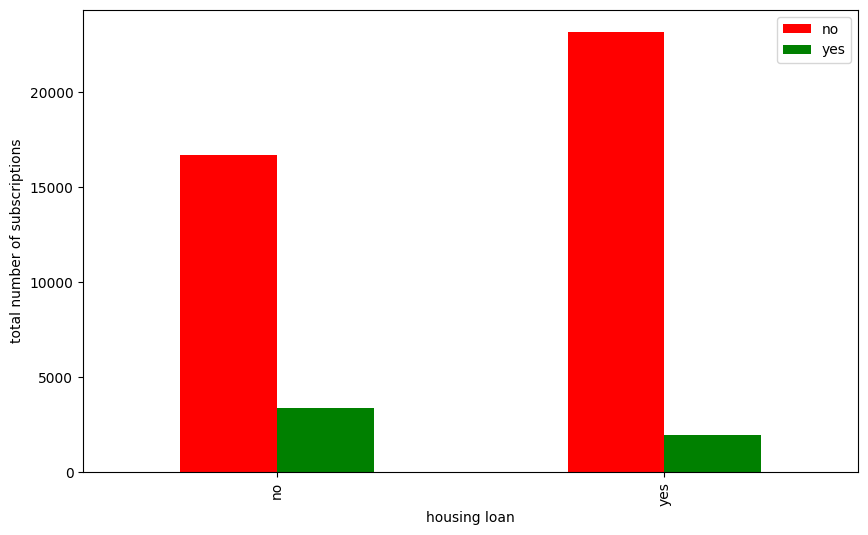

In [61]:
pd.crosstab(df.housing, df.outcome).plot(kind="bar", figsize=(10,6), color=["red", "green"])
plt.xlabel("housing loan")
plt.ylabel("total number of subscriptions")
plt.legend(["no","yes"])

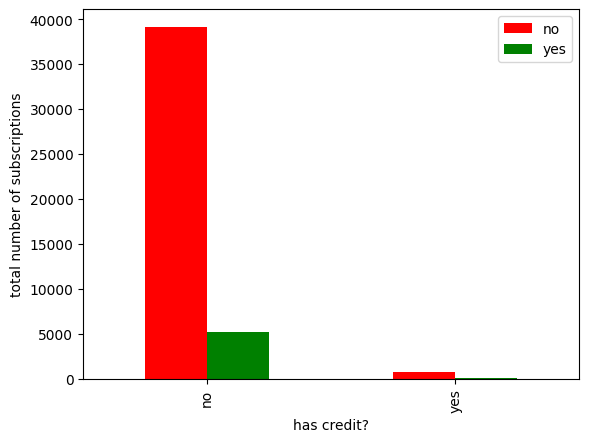

In [62]:
pd.crosstab(df.default, df.outcome).plot(kind="bar",  color=["red", "green"])
plt.xlabel("has credit?")
plt.ylabel("total number of subscriptions")
plt.legend(["no","yes"])

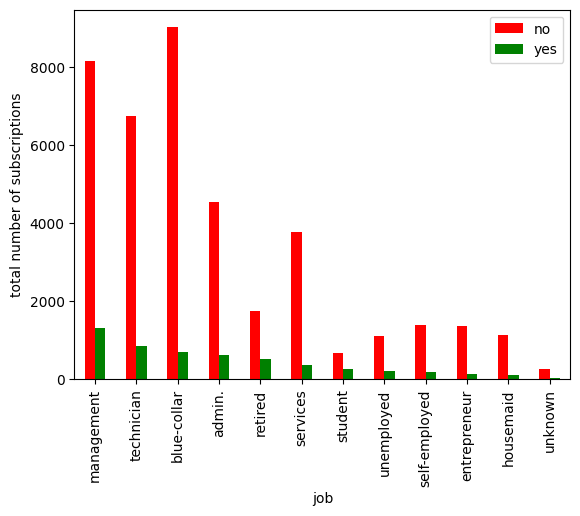

In [66]:
cross_tab = pd.crosstab(df['job'], df['outcome'])

cross_tab = cross_tab.sort_values(by='yes', ascending=False)

cross_tab.plot(kind="bar", color=["red", "green"])
plt.xlabel("job")
plt.ylabel("total number of subscriptions")
plt.legend(["no", "yes"])

# Show the plot
plt.show()


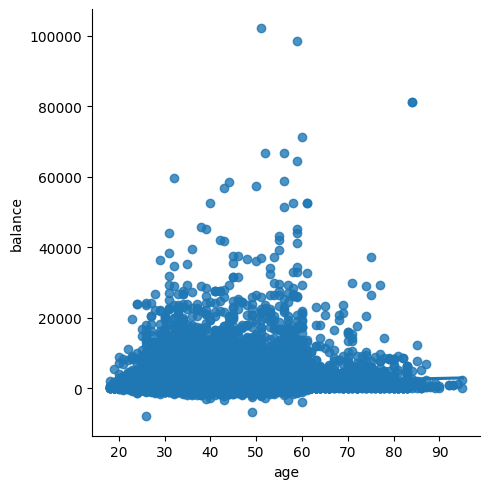

In [ ]:
sns.lmplot(x="age", y="balance", data=df);

In [72]:
le=LabelEncoder()
df["job"] = le.fit_transform(df["job"])
df["marital"]= le.fit_transform(df["marital"])
df["education"]= le.fit_transform(df["education"])
df["default"]= le.fit_transform(df["default"])
df["contact"]= le.fit_transform(df["contact"])
df["month"]= le.fit_transform(df["month"])
df["poutcome"]= le.fit_transform(df["poutcome"])
df["housing"]= le.fit_transform(df["housing"])
df["outcome"]= le.fit_transform(df["outcome"])

In [73]:
correlation=df.corr()
correlation

,age,job,marital,education,default,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,outcome
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.148395
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348
month,-0.042357,-0.092870,-0.006991,-0.057304,0.011486,0.019777,0.271481,0.361145,-0.006028,1.000000,0.006314,-0.110031,0.033065,0.022727,-0.033038,-0.024471


<Axes: >

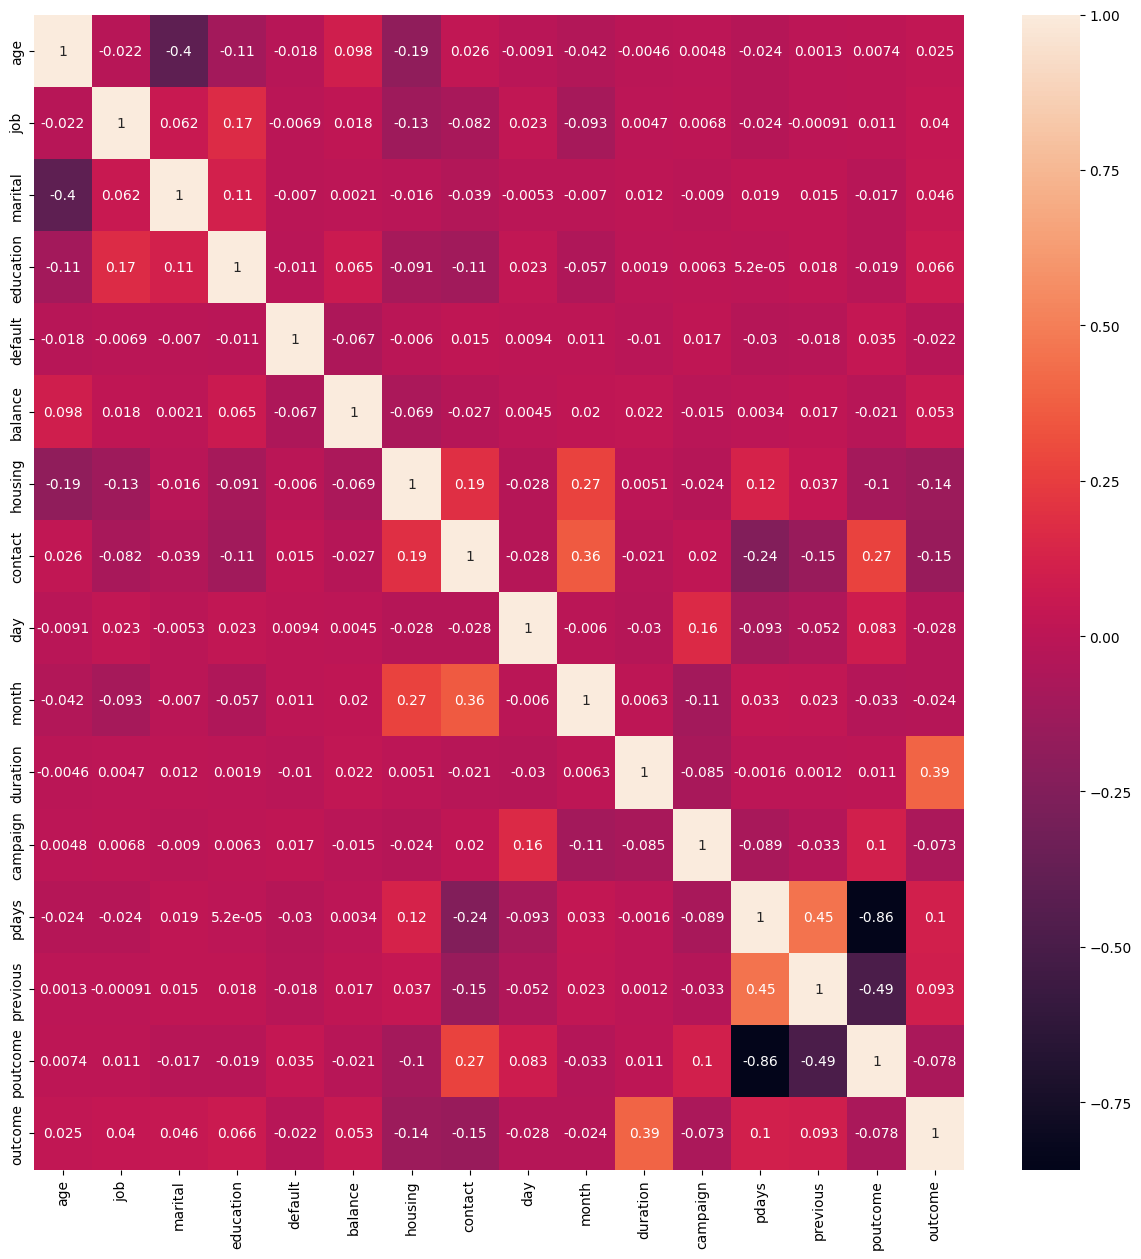

In [74]:
plt.subplots(figsize=(15,15))
sns.heatmap(correlation,annot=True)

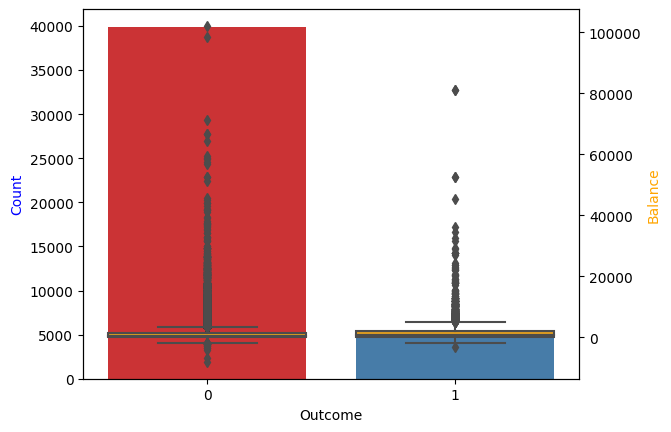

In [76]:
fig, ax1 = plt.subplots()

# Bar plot for the categorical column
sns.countplot(x='outcome', data=df, ax=ax1, palette='Set1')
ax1.set_xlabel('Outcome')
ax1.set_ylabel('Count', color='blue')

# Create a second y-axis for the box plot of the numerical column
ax2 = ax1.twinx()
sns.boxplot(x='outcome', y='balance', data=df, ax=ax2, color='orange')

# Set labels for the numerical column
ax2.set_ylabel('Balance', color='orange')

# Show the plot
plt.show()

In [75]:
x=df[['age','job','marital','education','balance','duration','pdays','previous']]

In [77]:
y=df.outcome

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [83]:
MLmodels = {"KNN": KNeighborsClassifier(),
          "Decision Tree": DecisionTreeClassifier(),
          "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [86]:
ScoringModels = fit_and_score(models=MLmodels,
                             X_train=x_train,
                             X_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
ScoringModels

{'KNN': 0.8776954550481035,
 'Decision Tree': 0.8424195510339489,
 'Random Forest': 0.8921817980758597}

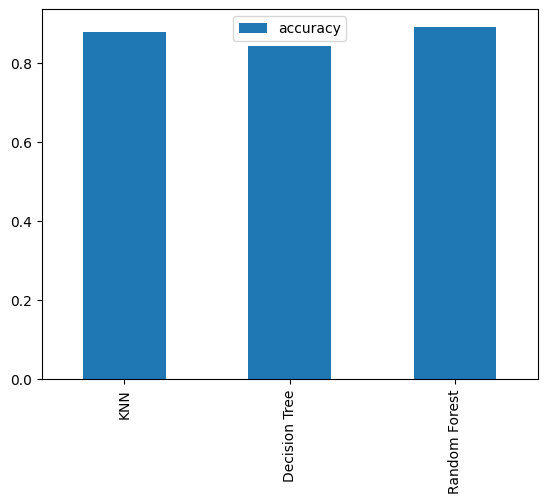

In [87]:
CompareModels = pd.DataFrame(ScoringModels, index=['accuracy'])
CompareModels.T.plot.bar();

RANDOMIZED SERACH CV

In [88]:
from sklearn.model_selection import RandomizedSearchCV

In [90]:
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [92]:
np.random.seed(35)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
rs_rf.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [93]:
rs_rf.best_params_

{'n_estimators': 760,
 'min_samples_split': 12,
 'min_samples_leaf': 5,
 'max_depth': None}

In [95]:
rs_rf.score(x_test, y_test)

0.8960521950680084

XGBOOSTER

In [96]:
from xgboost import XGBClassifier

In [98]:
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [99]:
y_predd=model.predict(x_test)

In [100]:
accuracy_score(y_test,y_predd)

0.8954992812119872

Finally our random forest method along with random search cv and xgbooster performs almost the same.

In [102]:
data=pd.read_csv("/content/test.csv")
data.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no


In [103]:
data["outcome"]=data["y"]

In [104]:
data.drop(data[["loan","y"]],axis=1)

,age,job,marital,education,default,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,outcome
0,30,unemployed,married,primary,no,1787,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,cellular,6,feb,129,4,211,3,other,no


In [105]:
data["job"] = le.fit_transform(data["job"])
data["marital"]= le.fit_transform(data["marital"])
data["education"]= le.fit_transform(data["education"])
data["default"]= le.fit_transform(data["default"])
data["contact"]= le.fit_transform(data["contact"])
data["month"]= le.fit_transform(data["month"])
data["poutcome"]= le.fit_transform(data["poutcome"])
data["housing"]= le.fit_transform(data["housing"])
data["outcome"]= le.fit_transform(data["outcome"])

In [106]:
X=data[['age','job','marital','education','balance','duration','pdays','previous']]

In [107]:
Y=data.outcome

In [108]:
res=rs_rf.predict(X)

In [109]:
print("Random Forest : ",accuracy_score(Y,res))

Random Forest :  0.9261225392612253


In [110]:
result=model.predict(X)

In [111]:
print("XGBoost : ",accuracy_score(Y,result))

XGBoost :  0.929219199292192


Hence ***XGBOOSTER*** model performs well for our dataset.